In [1]:
pip install scikit-multilearn

In [2]:
pip install liac-arff

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import os

file_df = pd.read_csv('data/data_set_label.csv')

In [4]:
file_df.shape

(796, 24)

In [5]:
X = file_df.loc[:, ['filename']].to_numpy()
y = file_df.loc[:, ["Healthy Lifestyle and Weight Loss", "Weight Lifting", "Running", "Yoga", "Haircare", "Makeup", "Skincare", "Outfit", "Accommodation", "Adventure", "Culture", "Food and drink"]].to_numpy()

In [6]:
X

array([['Beauty_1.mp4'],
       ['Beauty_2.mp4'],
       ['Beauty_3.mp4'],
       ['Beauty_4.mp4'],
       ['Beauty_5.mp4'],
       ['Beauty_6.mp4'],
       ['Beauty_7.mp4'],
       ['Beauty_8.mp4'],
       ['Beauty_9.mp4'],
       ['Beauty_10.mp4'],
       ['Beauty_11.mp4'],
       ['Beauty_12.mp4'],
       ['Beauty_13.mp4'],
       ['Beauty_14.mp4'],
       ['Beauty_15.mp4'],
       ['Beauty_16.mp4'],
       ['Beauty_17.mp4'],
       ['Beauty_18.mp4'],
       ['Beauty_19.mp4'],
       ['Beauty_20.mp4'],
       ['Beauty_21.mp4'],
       ['Beauty_22.mp4'],
       ['Beauty_23.mp4'],
       ['Beauty_24.mp4'],
       ['Beauty_25.mp4'],
       ['Beauty_26.mp4'],
       ['Beauty_27.mp4'],
       ['Beauty_28.mp4'],
       ['Beauty_29.mp4'],
       ['Beauty_30.mp4'],
       ['Beauty_31.mp4'],
       ['Beauty_32.mp4'],
       ['Beauty_33.mp4'],
       ['Beauty_34.mp4'],
       ['Beauty_35.mp4'],
       ['Beauty_36.mp4'],
       ['Beauty_37.mp4'],
       ['Beauty_38.mp4'],
       ['Beauty_39.mp

In [7]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [8]:
from skmultilearn.dataset import load_dataset
from skmultilearn.model_selection import iterative_train_test_split

#X, y, _, _ = load_dataset('scene', 'undivided')

# Split the data into training, testing, and validation sets
X_train, y_train, X_temp, y_temp = iterative_train_test_split(X, y, test_size=0.2)
X_test, y_test, X_val, y_val = iterative_train_test_split(X_temp, y_temp, test_size=0.5)


In [9]:
X_train

array([['Beauty_2.mp4'],
       ['Beauty_4.mp4'],
       ['Beauty_6.mp4'],
       ['Beauty_8.mp4'],
       ['Beauty_10.mp4'],
       ['Beauty_12.mp4'],
       ['Beauty_14.mp4'],
       ['Beauty_16.mp4'],
       ['Beauty_18.mp4'],
       ['Beauty_20.mp4'],
       ['Beauty_22.mp4'],
       ['Beauty_24.mp4'],
       ['Beauty_26.mp4'],
       ['Beauty_28.mp4'],
       ['Beauty_30.mp4'],
       ['Beauty_32.mp4'],
       ['Beauty_34.mp4'],
       ['Beauty_36.mp4'],
       ['Beauty_37.mp4'],
       ['Beauty_38.mp4'],
       ['Beauty_39.mp4'],
       ['Beauty_41.mp4'],
       ['Beauty_43.mp4'],
       ['Beauty_47.mp4'],
       ['Beauty_48.mp4'],
       ['Beauty_51.mp4'],
       ['Beauty_52.mp4'],
       ['Beauty_54.mp4'],
       ['Beauty_56.mp4'],
       ['Beauty_59.mp4'],
       ['Beauty_60.mp4'],
       ['Beauty_63.mp4'],
       ['Beauty_64.mp4'],
       ['Beauty_66.mp4'],
       ['Beauty_68.mp4'],
       ['Beauty_70.mp4'],
       ['Beauty_72.mp4'],
       ['Beauty_75.mp4'],
       ['Beauty_

In [10]:
X_train.shape

(636, 1)

In [11]:
X_test

array([['Beauty_1.mp4'],
       ['Beauty_3.mp4'],
       ['Beauty_9.mp4'],
       ['Beauty_13.mp4'],
       ['Beauty_15.mp4'],
       ['Beauty_19.mp4'],
       ['Beauty_25.mp4'],
       ['Beauty_29.mp4'],
       ['Beauty_31.mp4'],
       ['Beauty_35.mp4'],
       ['Beauty_42.mp4'],
       ['Beauty_44.mp4'],
       ['Beauty_49.mp4'],
       ['Beauty_55.mp4'],
       ['Beauty_58.mp4'],
       ['Beauty_62.mp4'],
       ['Beauty_67.mp4'],
       ['Beauty_71.mp4'],
       ['Beauty_74.mp4'],
       ['Beauty_121.mp4'],
       ['Beauty_127.mp4'],
       ['Beauty_129.mp4'],
       ['Beauty_134.mp4'],
       ['Beauty_140.mp4'],
       ['Beauty_145.mp4'],
       ['Beauty_177.mp4'],
       ['Beauty_181.mp4'],
       ['Beauty_185.mp4'],
       ['Sport_5.mp4'],
       ['Sport_11.mp4'],
       ['Sport_13.mp4'],
       ['Sport_19.mp4'],
       ['Sport_21.mp4'],
       ['Sport_25.mp4'],
       ['Sport_29.mp4'],
       ['Sport_66.mp4'],
       ['Sport_72.mp4'],
       ['Sport_74.mp4'],
       ['Sport_78

In [12]:
X_test.shape

(79, 1)

In [13]:
X_val

array([['Beauty_5.mp4'],
       ['Beauty_7.mp4'],
       ['Beauty_11.mp4'],
       ['Beauty_17.mp4'],
       ['Beauty_21.mp4'],
       ['Beauty_23.mp4'],
       ['Beauty_27.mp4'],
       ['Beauty_33.mp4'],
       ['Beauty_40.mp4'],
       ['Beauty_45.mp4'],
       ['Beauty_46.mp4'],
       ['Beauty_50.mp4'],
       ['Beauty_53.mp4'],
       ['Beauty_57.mp4'],
       ['Beauty_61.mp4'],
       ['Beauty_65.mp4'],
       ['Beauty_69.mp4'],
       ['Beauty_73.mp4'],
       ['Beauty_118.mp4'],
       ['Beauty_123.mp4'],
       ['Beauty_125.mp4'],
       ['Beauty_132.mp4'],
       ['Beauty_136.mp4'],
       ['Beauty_138.mp4'],
       ['Beauty_143.mp4'],
       ['Beauty_174.mp4'],
       ['Beauty_179.mp4'],
       ['Beauty_183.mp4'],
       ['Beauty_210.mp4'],
       ['Sport_3.mp4'],
       ['Sport_7.mp4'],
       ['Sport_9.mp4'],
       ['Sport_15.mp4'],
       ['Sport_17.mp4'],
       ['Sport_23.mp4'],
       ['Sport_27.mp4'],
       ['Sport_31.mp4'],
       ['Sport_68.mp4'],
       ['Sport_

In [14]:
X_val.shape

(81, 1)

In [15]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [16]:
y_train.shape

(636, 12)

In [17]:
y_test

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0,

In [18]:
y_test.shape

(79, 12)

In [19]:
y_val

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0,

In [20]:
y_val.shape

(81, 12)

In [21]:
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from collections import Counter

pd.DataFrame({
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=2) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=2) for combination in row),
    'validation' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_val, order=2) for combination in row)
}).T.fillna(0.0)

,"(5, 5)","(6, 6)","(5, 6)","(7, 7)","(5, 7)","(4, 4)","(0, 0)","(2, 2)","(1, 1)","(1, 2)",...,"(0, 3)","(8, 8)","(9, 9)","(11, 11)","(8, 9)","(9, 11)","(8, 11)","(9, 10)","(10, 11)","(10, 10)"
train,97.0,53.0,2.0,72.0,1.0,6.0,61.0,61.0,71.0,1.0,...,4.0,26.0,138.0,46.0,12.0,23.0,6.0,38.0,15.0,43.0
test,12.0,6.0,0.0,9.0,0.0,1.0,8.0,7.0,9.0,0.0,...,1.0,3.0,17.0,6.0,1.0,3.0,0.0,5.0,1.0,5.0
validation,12.0,7.0,0.0,9.0,0.0,1.0,7.0,8.0,9.0,0.0,...,0.0,3.0,17.0,5.0,2.0,3.0,1.0,4.0,1.0,6.0


In [22]:
X_train.shape[0], X_test.shape[0], X_val.shape[0]

(636, 79, 81)

In [23]:
y_train.shape[0], y_test.shape[0], y_val.shape[0]

(636, 79, 81)

In [24]:
#Define Column name
train_column = ["filename"]

# Create a DataFrame
train_df = pd.DataFrame(X_train, columns = train_column)

# Display the DataFrame
print(train_df)

           filename
0      Beauty_2.mp4
1      Beauty_4.mp4
2      Beauty_6.mp4
3      Beauty_8.mp4
4     Beauty_10.mp4
..              ...
631  Travel_218.mp4
632  Travel_219.mp4
633  Travel_220.mp4
634  Travel_221.mp4
635  Travel_222.mp4

[636 rows x 1 columns]


In [25]:
# Add a new column with the same length as the DataFrame
train_df["data_split"] = ["train"] * len(train_df)

# Display the DataFrame with the new column
print(train_df)

           filename data_split
0      Beauty_2.mp4      train
1      Beauty_4.mp4      train
2      Beauty_6.mp4      train
3      Beauty_8.mp4      train
4     Beauty_10.mp4      train
..              ...        ...
631  Travel_218.mp4      train
632  Travel_219.mp4      train
633  Travel_220.mp4      train
634  Travel_221.mp4      train
635  Travel_222.mp4      train

[636 rows x 2 columns]


In [26]:
#Define Column name
test_column = ["filename"]

# Create a DataFrame
test_df = pd.DataFrame(X_test, columns = test_column)

# Display the DataFrame
print(test_df)

          filename
0     Beauty_1.mp4
1     Beauty_3.mp4
2     Beauty_9.mp4
3    Beauty_13.mp4
4    Beauty_15.mp4
..             ...
74   Travel_99.mp4
75  Travel_110.mp4
76  Travel_115.mp4
77  Travel_143.mp4
78  Travel_154.mp4

[79 rows x 1 columns]


In [27]:
# Add a new column with the same length as the DataFrame
test_df["data_split"] = ["test"] * len(test_df)

# Display the DataFrame with the new column
print(test_df)

          filename data_split
0     Beauty_1.mp4       test
1     Beauty_3.mp4       test
2     Beauty_9.mp4       test
3    Beauty_13.mp4       test
4    Beauty_15.mp4       test
..             ...        ...
74   Travel_99.mp4       test
75  Travel_110.mp4       test
76  Travel_115.mp4       test
77  Travel_143.mp4       test
78  Travel_154.mp4       test

[79 rows x 2 columns]


In [28]:
#Define Column name
val_column = ["filename"]

# Create a DataFrame
val_df = pd.DataFrame(X_val, columns = test_column)

# Display the DataFrame
print(val_df)

          filename
0     Beauty_5.mp4
1     Beauty_7.mp4
2    Beauty_11.mp4
3    Beauty_17.mp4
4    Beauty_21.mp4
..             ...
76   Travel_97.mp4
77  Travel_113.mp4
78  Travel_117.mp4
79  Travel_119.mp4
80  Travel_147.mp4

[81 rows x 1 columns]


In [29]:
# Add a new column with the same length as the DataFrame
val_df["data_split"] = ["validation"] * len(val_df)

# Display the DataFrame with the new column
print(val_df)

          filename  data_split
0     Beauty_5.mp4  validation
1     Beauty_7.mp4  validation
2    Beauty_11.mp4  validation
3    Beauty_17.mp4  validation
4    Beauty_21.mp4  validation
..             ...         ...
76   Travel_97.mp4  validation
77  Travel_113.mp4  validation
78  Travel_117.mp4  validation
79  Travel_119.mp4  validation
80  Travel_147.mp4  validation

[81 rows x 2 columns]


In [30]:
concat_df = pd.concat([train_df, test_df, val_df], axis=0)

# Display the concatenated DataFrame along columns
print(concat_df)

          filename  data_split
0     Beauty_2.mp4       train
1     Beauty_4.mp4       train
2     Beauty_6.mp4       train
3     Beauty_8.mp4       train
4    Beauty_10.mp4       train
..             ...         ...
76   Travel_97.mp4  validation
77  Travel_113.mp4  validation
78  Travel_117.mp4  validation
79  Travel_119.mp4  validation
80  Travel_147.mp4  validation

[796 rows x 2 columns]


In [31]:
# Inner join
join_df = pd.merge(file_df, concat_df, on = "filename")
print(join_df)

      No        filename data_split_x  \
0      1    Beauty_1.mp4         test   
1      2    Beauty_2.mp4        train   
2      3    Beauty_3.mp4        train   
3      4    Beauty_4.mp4        train   
4      5    Beauty_5.mp4        train   
..   ...             ...          ...   
791  218  Travel_218.mp4        train   
792  219  Travel_219.mp4        train   
793  220  Travel_220.mp4        train   
794  221  Travel_221.mp4        train   
795  222  Travel_222.mp4        train   

                                                 Links          main_label  \
0    https://www.tiktok.com/@zo_pim/video/730578817...  Beauty and Fashion   
1    https://www.tiktok.com/@zomtichamakeover/video...  Beauty and Fashion   
2    https://www.tiktok.com/@babyjingko/video/73128...  Beauty and Fashion   
3    https://www.tiktok.com/@baifarm/video/73056464...  Beauty and Fashion   
4    https://www.tiktok.com/@fahzii2535/video/73055...  Beauty and Fashion   
..                                     

In [32]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'data/data_set_label.csv'

# Export the DataFrame to a CSV file
join_df.to_csv(csv_file_path, index=False)

print(f'DataFrame exported to CSV file: {csv_file_path}')

DataFrame exported to CSV file: data/data_set_label.csv


EDA Part

In [93]:
train_count = concat_df['data_split'].value_counts().get('train', 0)
test_count = concat_df['data_split'].value_counts().get('test', 0)
val_count = concat_df['data_split'].value_counts().get('validation', 0)

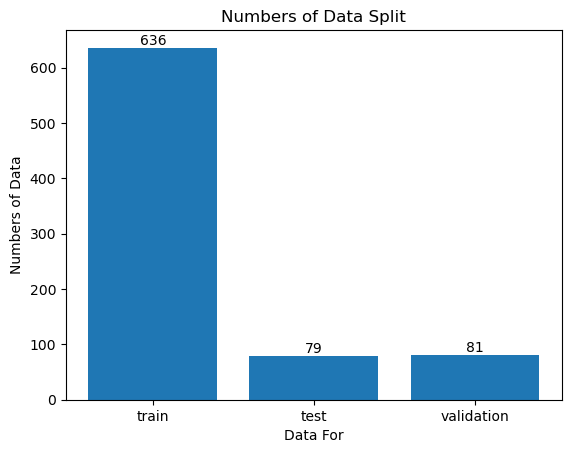

In [94]:
import matplotlib.pyplot as plt

# Create a sample DataFrame
data_data = {'data_for': ['train', 'test', 'validation'],
        'value': [train_count, test_count, val_count]}

data_df = pd.DataFrame(data_data)

# Plot a bar chart
plt.bar(data_df['data_for'], data_df['value'])

# Add labels and title
plt.xlabel('Data For')
plt.ylabel('Numbers of Data')
plt.title('Numbers of Data Split')

for i, value in enumerate(data_df['value']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')
    
# Show the plot
plt.show()

In [95]:
print(file_df)

      No        filename data_split  \
0      1    Beauty_1.mp4       test   
1      2    Beauty_2.mp4      train   
2      3    Beauty_3.mp4      train   
3      4    Beauty_4.mp4      train   
4      5    Beauty_5.mp4      train   
..   ...             ...        ...   
791  218  Travel_218.mp4      train   
792  219  Travel_219.mp4      train   
793  220  Travel_220.mp4      train   
794  221  Travel_221.mp4      train   
795  222  Travel_222.mp4      train   

                                                 Links          main_label  \
0    https://www.tiktok.com/@zo_pim/video/730578817...  Beauty and Fashion   
1    https://www.tiktok.com/@zomtichamakeover/video...  Beauty and Fashion   
2    https://www.tiktok.com/@babyjingko/video/73128...  Beauty and Fashion   
3    https://www.tiktok.com/@baifarm/video/73056464...  Beauty and Fashion   
4    https://www.tiktok.com/@fahzii2535/video/73055...  Beauty and Fashion   
..                                                 ...         

In [96]:
columns_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'duration', 'frame_count', 'height', 'width', 'fps', 'data_split','count']

# Drop the specified columns
eda_sub_df = file_df.drop(columns=columns_to_drop)

print(eda_sub_df)

     Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                    0               0        0     0   
1                                    0               0        0     0   
2                                    0               0        0     0   
3                                    0               0        0     0   
4                                    0               0        0     0   
..                                 ...             ...      ...   ...   
791                                  0               0        0     0   
792                                  0               0        0     0   
793                                  0               0        0     0   
794                                  0               0        0     0   
795                                  0               0        0     0   

     Haircare  Makeup  Skincare  Outfit  Accommodation  Adventure  Culture  \
0           1       0         0       0      

In [97]:
# Sum the occurrences of 1 in each column
sub_column_sums =eda_sub_df.sum(axis=0)
print(sub_column_sums)


Healthy Lifestyle and Weight Loss     76
Weight Lifting                        89
Running                               76
Yoga                                  73
Haircare                               8
Makeup                               121
Skincare                              66
Outfit                                90
Accommodation                         32
Adventure                            172
Culture                               54
Food and drink                        57
dtype: int64


In [98]:
# Create a new DataFrame from the result
result_sub_df = pd.DataFrame({'Sub Label Name': sub_column_sums.index, 'Counts': sub_column_sums.values})
print(result_sub_df)

                       Sub Label Name  Counts
0   Healthy Lifestyle and Weight Loss      76
1                      Weight Lifting      89
2                             Running      76
3                                Yoga      73
4                            Haircare       8
5                              Makeup     121
6                            Skincare      66
7                              Outfit      90
8                       Accommodation      32
9                           Adventure     172
10                            Culture      54
11                     Food and drink      57


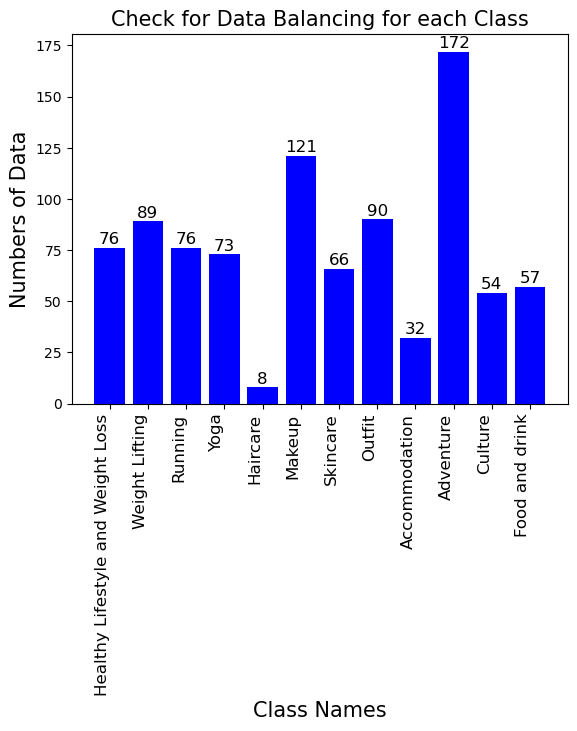

In [99]:
# Plot a bar chart
plt.bar(result_sub_df['Sub Label Name'], result_sub_df['Counts'], color = 'blue')

# Add labels and title
plt.xlabel('Class Names', fontsize = 15)
plt.ylabel('Numbers of Data', fontsize = 15)
plt.title('Check for Data Balancing for each Class', fontsize = 15)
plt.xticks(rotation=90, ha='right', fontsize = 12)

# Annotate each bar with its corresponding value
for i, value in enumerate(result_sub_df['Counts']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize = 12)
    
# Show the plot
plt.show()

In [100]:
print(file_df)

      No        filename data_split  \
0      1    Beauty_1.mp4       test   
1      2    Beauty_2.mp4      train   
2      3    Beauty_3.mp4      train   
3      4    Beauty_4.mp4      train   
4      5    Beauty_5.mp4      train   
..   ...             ...        ...   
791  218  Travel_218.mp4      train   
792  219  Travel_219.mp4      train   
793  220  Travel_220.mp4      train   
794  221  Travel_221.mp4      train   
795  222  Travel_222.mp4      train   

                                                 Links          main_label  \
0    https://www.tiktok.com/@zo_pim/video/730578817...  Beauty and Fashion   
1    https://www.tiktok.com/@zomtichamakeover/video...  Beauty and Fashion   
2    https://www.tiktok.com/@babyjingko/video/73128...  Beauty and Fashion   
3    https://www.tiktok.com/@baifarm/video/73056464...  Beauty and Fashion   
4    https://www.tiktok.com/@fahzii2535/video/73055...  Beauty and Fashion   
..                                                 ...         

In [101]:
# Extract the 'duration' column
duration_column = file_df['duration']

# Calculate max, min, mean, and standard deviation
max_duration = duration_column.max()
min_duration = duration_column.min()
mean_duration = duration_column.mean()
std_dev_duration = duration_column.std()

# Print the results
print(f'Max Duration: {max_duration:.1f}', 'seconds')
print(f'Min Duration: {min_duration:.1f}', 'seconds')
print(f'Mean Duration: {mean_duration:.1f}', 'seconds')
print(f'Standard Deviation Duration: {std_dev_duration:.1f}', 'seconds')

Max Duration: 600.0 seconds
Min Duration: 5.6 seconds
Mean Duration: 64.8 seconds
Standard Deviation Duration: 67.0 seconds


Text(0.5, 1.0, 'Distribution of Duration (seconds)')

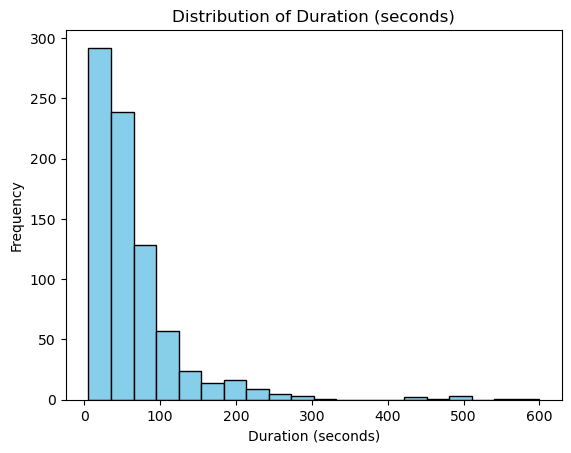

In [102]:
# Plot histogram
plt.hist(duration_column, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration (seconds)')

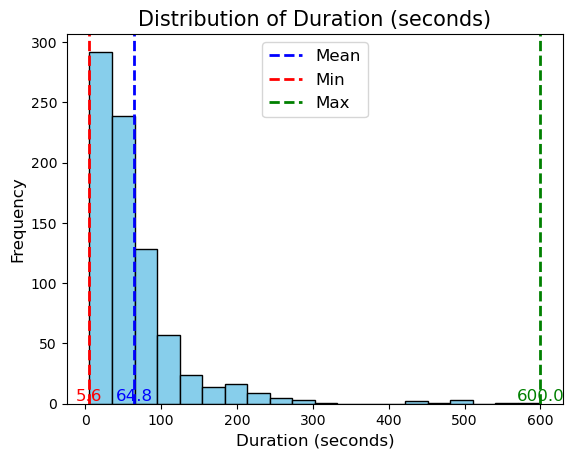

In [103]:
# Plot histogram
plt.hist(duration_column, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Duration (seconds)', fontsize =12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Distribution of Duration (seconds)', fontsize = 15)

# Add vertical lines for mean and standard deviation
plt.axvline(mean_duration, color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(min_duration, color='red', linestyle='dashed', linewidth=2, label='Min')
plt.axvline(max_duration, color='green', linestyle='dashed', linewidth=2, label='Max')

plt.legend(loc='upper center', fontsize = 12)

# Add labels for min, max, mean, and sd
plt.text(min_duration, 0, f'{min_duration:.1f}', rotation=0, va='bottom', ha = 'center', fontsize = 12, color = 'red')
plt.text(max_duration, 0, f'{max_duration:.1f}', rotation=0, va='bottom', ha='center', fontsize = 12, color = 'green')
plt.text(mean_duration, 0, f'{mean_duration:.1f}', rotation=0, va='bottom', ha='center', fontsize = 12, color = 'blue')

# Show the plot
plt.show()

In [104]:
train_label = pd.read_csv('data/train_label.csv')
test_label = pd.read_csv('data/test_label.csv')
val_label = pd.read_csv('data/validate_label.csv')

In [105]:
train_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'duration', 'frame_count', 'height', 'width', 'fps', 'data_split']

# Drop the specified columns
train_sub_df = train_label.drop(columns=train_to_drop)

print(train_sub_df)

     Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                    0               0        0     0   
1                                    0               0        0     0   
2                                    0               0        0     0   
3                                    0               0        0     0   
4                                    0               0        0     0   
..                                 ...             ...      ...   ...   
710                                  0               0        0     1   
711                                  0               0        0     1   
712                                  0               0        0     1   
713                                  0               0        0     1   
714                                  0               0        0     1   

     Haircare  Makeup  Skincare  Outfit  Accommodation  Adventure  Culture  \
0           0       0         0       0      

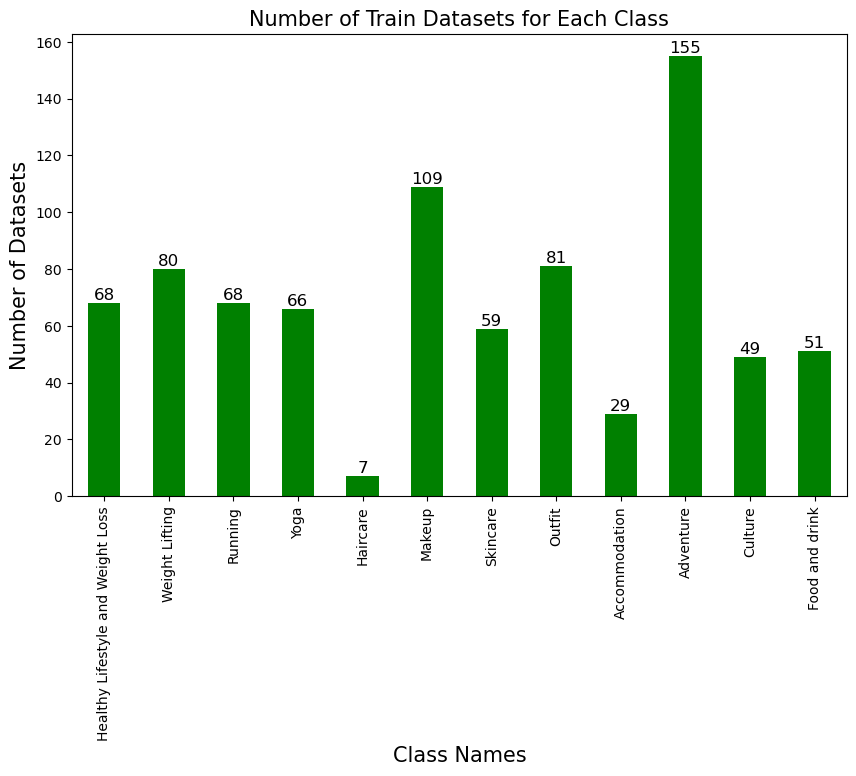

In [106]:
# Count the number of 1s for each column
count_series_train = train_sub_df.sum()

# Plot the bar chart
count_series_train.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Number of Train Datasets for Each Class', fontsize = 15)
plt.xlabel('Class Names', fontsize = 15)
plt.ylabel('Number of Datasets', fontsize = 15)

for i, v in enumerate(count_series_train):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize = 12)

plt.show()

In [107]:
test_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'duration', 'frame_count', 'height', 'width', 'fps', 'data_split']

# Drop the specified columns
test_sub_df = test_label.drop(columns=test_to_drop)

print(test_sub_df)

    Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                   0               0        0     0   
1                                   0               0        0     0   
2                                   0               0        0     0   
3                                   0               0        0     0   
4                                   0               0        0     0   
..                                ...             ...      ...   ...   
76                                  0               1        0     0   
77                                  0               0        0     1   
78                                  0               0        0     1   
79                                  0               0        0     1   
80                                  0               0        0     1   

    Haircare  Makeup  Skincare  Outfit  Accommodation  Adventure  Culture  \
0          0       0         0       0              1     

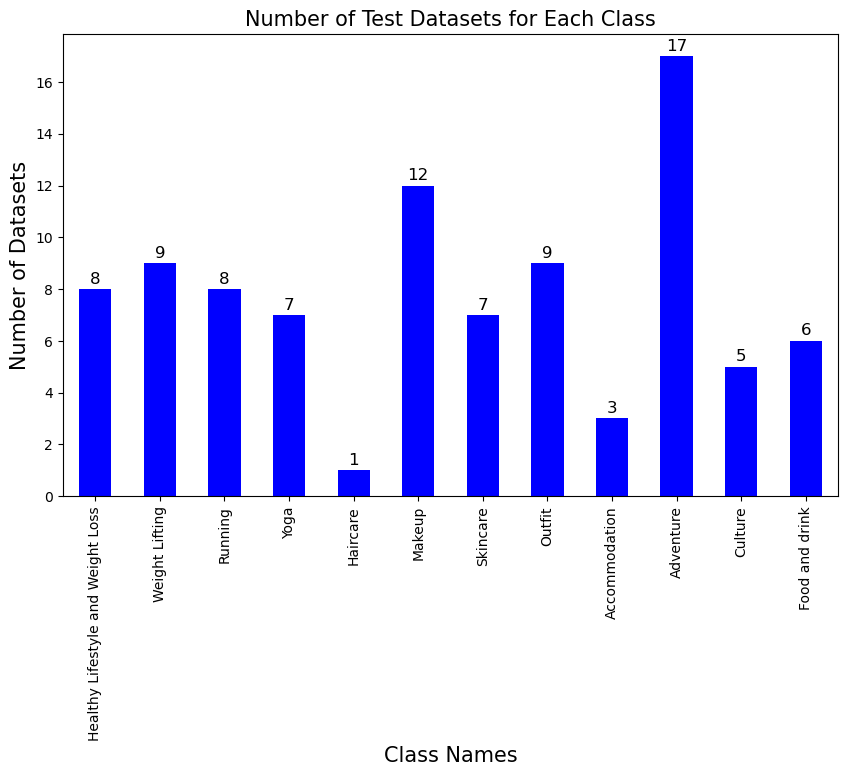

In [108]:
# Count the number of 1s for each column
count_series_test = test_sub_df.sum()

# Plot the bar chart
count_series_test.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Number of Test Datasets for Each Class', fontsize = 15)
plt.xlabel('Class Names', fontsize = 15)
plt.ylabel('Number of Datasets', fontsize = 15)

for i, v in enumerate(count_series_test):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize = 12)

plt.show()

In [109]:
val_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'duration', 'frame_count', 'height', 'width', 'fps', 'data_split']

# Drop the specified columns
val_sub_df = val_label.drop(columns=test_to_drop)

print(val_sub_df)

    Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                   0               0        0     0   
1                                   0               0        0     0   
2                                   0               0        0     0   
3                                   0               0        0     0   
4                                   0               0        0     0   
..                                ...             ...      ...   ...   
76                                  0               1        0     0   
77                                  0               1        0     0   
78                                  0               0        0     1   
79                                  0               0        0     1   
80                                  0               0        0     1   

    Haircare  Makeup  Skincare  Outfit  Accommodation  Adventure  Culture  \
0          0       0         0       0              1     

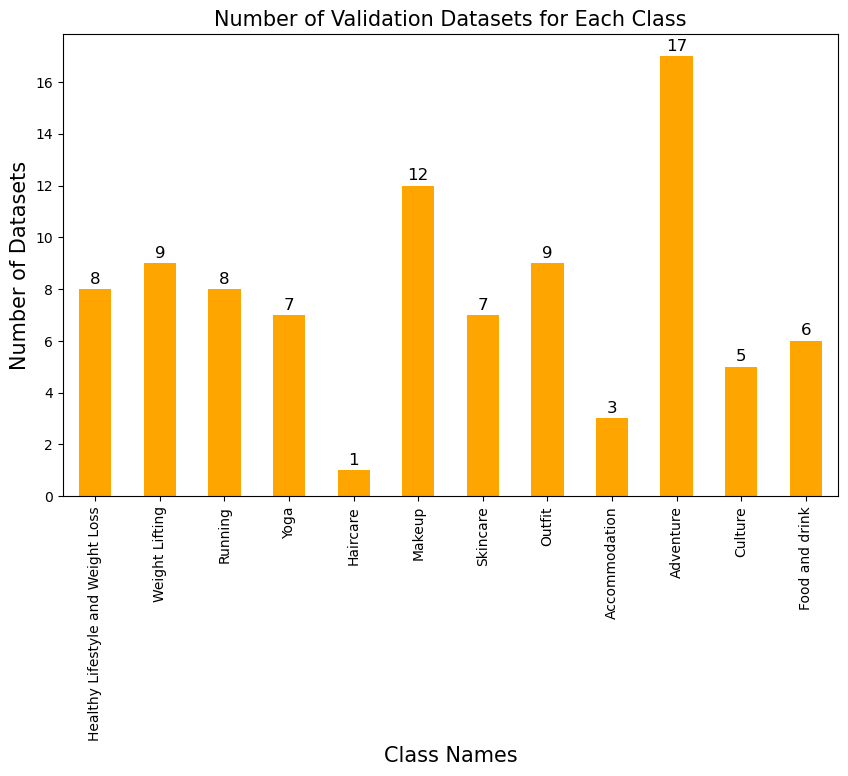

In [110]:
# Count the number of 1s for each column
count_series_val = val_sub_df.sum()

# Plot the bar chart
count_series_val.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Number of Validation Datasets for Each Class', fontsize = 15)
plt.xlabel('Class Names', fontsize = 15)
plt.ylabel('Number of Datasets', fontsize = 15)

for i, v in enumerate(count_series_val):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

In [111]:
train_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'frame_count', 'height', 'width', 'fps', 'data_split']

#Drop the specified columns
train_dur_df = train_label.drop(columns=train_to_drop)

print(train_dur_df)

     Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                    0               0        0     0   
1                                    0               0        0     0   
2                                    0               0        0     0   
3                                    0               0        0     0   
4                                    0               0        0     0   
..                                 ...             ...      ...   ...   
710                                  0               0        0     1   
711                                  0               0        0     1   
712                                  0               0        0     1   
713                                  0               0        0     1   
714                                  0               0        0     1   

     Haircare  Makeup  Skincare  Outfit  Accommodation  Adventure  Culture  \
0           0       0         0       0      

In [112]:
test_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'frame_count', 'height', 'width', 'fps', 'data_split']

# Drop the specified columns
test_dur_df = test_label.drop(columns=test_to_drop)

print(test_dur_df)

    Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                   0               0        0     0   
1                                   0               0        0     0   
2                                   0               0        0     0   
3                                   0               0        0     0   
4                                   0               0        0     0   
..                                ...             ...      ...   ...   
76                                  0               1        0     0   
77                                  0               0        0     1   
78                                  0               0        0     1   
79                                  0               0        0     1   
80                                  0               0        0     1   

    Haircare  Makeup  Skincare  Outfit  Accommodation  Adventure  Culture  \
0          0       0         0       0              1     

In [113]:
val_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'frame_count', 'height', 'width', 'fps', 'data_split']

# Drop the specified columns
val_dur_df = val_label.drop(columns=val_to_drop)

print(val_dur_df)

    Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                   0               0        0     0   
1                                   0               0        0     0   
2                                   0               0        0     0   
3                                   0               0        0     0   
4                                   0               0        0     0   
..                                ...             ...      ...   ...   
76                                  0               1        0     0   
77                                  0               1        0     0   
78                                  0               0        0     1   
79                                  0               0        0     1   
80                                  0               0        0     1   

    Haircare  Makeup  Skincare  Outfit  Accommodation  Adventure  Culture  \
0          0       0         0       0              1     

In [114]:
columns_to_drop2 = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'frame_count', 'height', 'width', 'fps', 'data_split','count']

# Drop the specified columns
eda_dur_df = file_df.drop(columns=columns_to_drop2)

print(eda_dur_df)

     Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                    0               0        0     0   
1                                    0               0        0     0   
2                                    0               0        0     0   
3                                    0               0        0     0   
4                                    0               0        0     0   
..                                 ...             ...      ...   ...   
791                                  0               0        0     0   
792                                  0               0        0     0   
793                                  0               0        0     0   
794                                  0               0        0     0   
795                                  0               0        0     0   

     Haircare  Makeup  Skincare  Outfit  Accommodation  Adventure  Culture  \
0           1       0         0       0      

In [115]:
# Create a new DataFrame with the product of 'duration' and each of the other 12 columns
product_df = eda_dur_df.copy()  # Copy the original DataFrame

# Multiply each column (except 'duration') by the 'duration'
for col in eda_dur_df.columns[:-1]:  # Exclude the last column 'duration'
    product_df[col] = product_df[col] * product_df['duration']

# Drop the 'duration' column as it's no longer needed
product_df = product_df.drop(columns=['duration'])

# Print the new DataFrame
print(product_df)

     Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                  0.0             0.0      0.0   0.0   
1                                  0.0             0.0      0.0   0.0   
2                                  0.0             0.0      0.0   0.0   
3                                  0.0             0.0      0.0   0.0   
4                                  0.0             0.0      0.0   0.0   
..                                 ...             ...      ...   ...   
791                                0.0             0.0      0.0   0.0   
792                                0.0             0.0      0.0   0.0   
793                                0.0             0.0      0.0   0.0   
794                                0.0             0.0      0.0   0.0   
795                                0.0             0.0      0.0   0.0   

      Haircare      Makeup  Skincare  Outfit  Accommodation  Adventure  \
0    34.633333    0.000000       0.0     0.0     

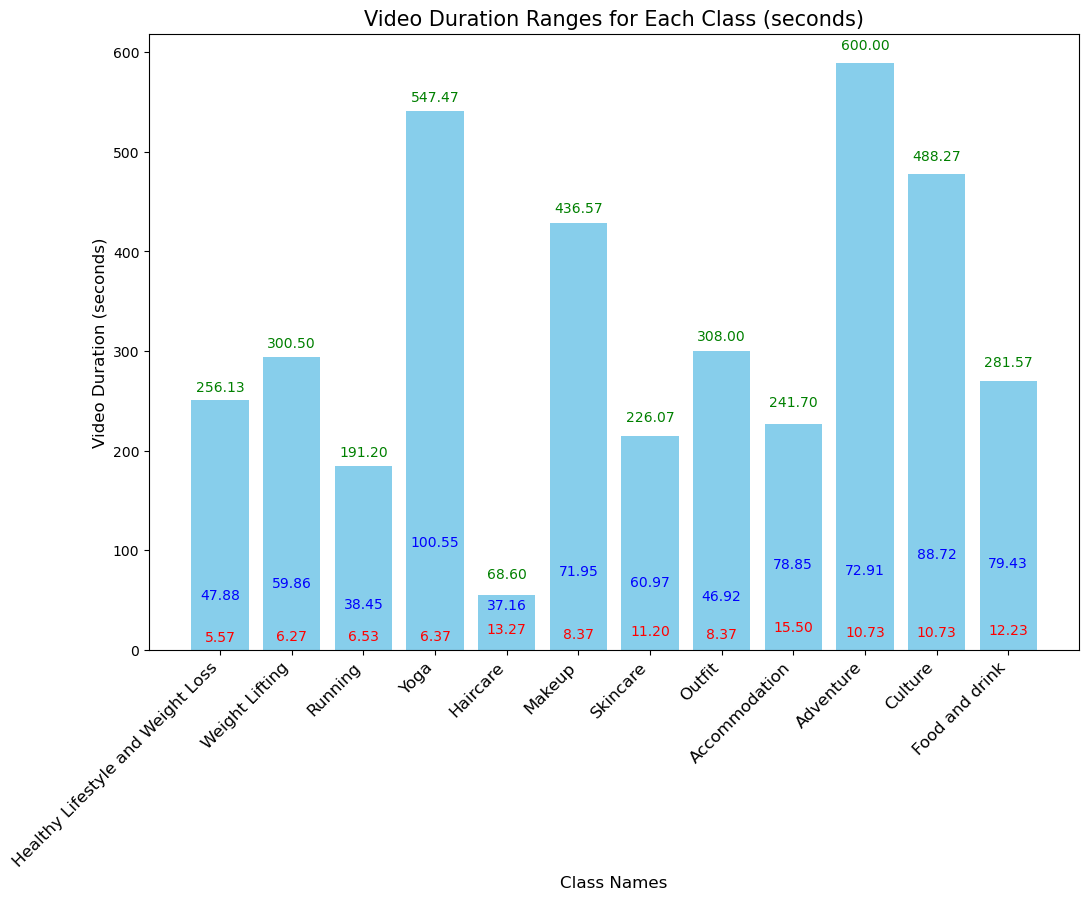

In [116]:
# Calculate min, max, and mean for each column excluding values equal to 0
stats_df = pd.DataFrame({
    'Min': product_df[product_df != 0].min(),
    'Max': product_df[product_df != 0].max(),
    'Mean': product_df[product_df != 0].mean()
})

plt.figure(figsize=(12, 8))

for column in stats_df.index:
    plt.bar(column, stats_df.loc[column, 'Max'] - stats_df.loc[column, 'Min'], label=column, color='skyblue')
    plt.text(column, stats_df.loc[column, 'Max'], f"{stats_df.loc[column, 'Max']:.2f}", ha='center', va='bottom', rotation=0, fontsize=10, color = 'green')
    plt.text(column, stats_df.loc[column, 'Mean'], f"{stats_df.loc[column, 'Mean']:.2f}", ha='center', va='bottom', rotation=0, fontsize=10, color = 'blue')
    plt.text(column, stats_df.loc[column, 'Min'], f"{stats_df.loc[column, 'Min']:.2f}", ha='center', va='bottom', rotation=0, fontsize=10, color = 'red')

# Configure plot labels and legend
plt.title("Video Duration Ranges for Each Class (seconds)", fontsize = 15)
plt.xlabel("Class Names", fontsize=12)
plt.ylabel("Video Duration (seconds)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

In [117]:
multi = pd.read_csv('data/data_set_label.csv')

In [118]:
multi

,No,filename,data_split_x,Links,main_label,sub_label,Healthy Lifestyle and Weight Loss,Weight Lifting,Running,Yoga,...,Adventure,Culture,Food and drink,duration,frame_count,height,width,fps,count,data_split_y
0,1,Beauty_1.mp4,test,https://www.tiktok.com/@zo_pim/video/730578817...,Beauty and Fashion,Haircare,0,0,0,0,...,0,0,0,34.633333,1039,1024,576,30,1,test
1,2,Beauty_2.mp4,train,https://www.tiktok.com/@zomtichamakeover/video...,Beauty and Fashion,Makeup,0,0,0,0,...,0,0,0,25.266667,758,1024,576,30,1,train
2,3,Beauty_3.mp4,train,https://www.tiktok.com/@babyjingko/video/73128...,Beauty and Fashion,Makeup,0,0,0,0,...,0,0,0,38.233333,1147,1024,576,30,1,test
3,4,Beauty_4.mp4,train,https://www.tiktok.com/@baifarm/video/73056464...,Beauty and Fashion,Makeup,0,0,0,0,...,0,0,0,64.600000,1938,1024,576,30,1,train
4,5,Beauty_5.mp4,train,https://www.tiktok.com/@fahzii2535/video/73055...,Beauty and Fashion,Makeup,0,0,0,0,...,0,0,0,105.833333,3175,1024,576,30,1,validation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,218,Travel_218.mp4,train,https://www.tiktok.com/@paikuble/video/7208202...,Travel,Adventure,0,0,0,0,...,1,0,0,22.533333,676,1024,576,30,1,train
792,219,Travel_219.mp4,train,https://www.tiktok.com/@paikuppy/video/7312985...,Travel,Adventure,0,0,0,0,...,1,0,0,94.066667,2822,1024,576,30,1,train
793,220,Travel_220.mp4,train,https://www.tiktok.com/@pang_ww/video/73153383...,Travel,Adventure,0,0,0,0,...,1,0,0,55.866667,1676,1024,576,30,1,train
794,221,Travel_221.mp4,train,https://www.tiktok.com/@pattypieeekaa/video/72...,Travel,Adventure,0,0,0,0,...,1,0,0,85.800000,2574,1024,576,30,1,train


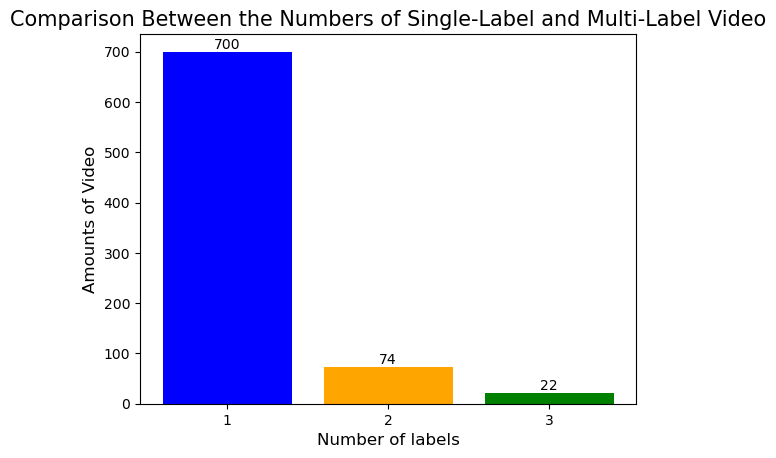

In [119]:
# Extract the 'count' column
count_column = multi['count']

# Count occurrences of 1, 2, and 3
count_1 = count_column[count_column == 1].count()
count_2 = count_column[count_column == 2].count()
count_3 = count_column[count_column == 3].count()

# Plot a bar chart
counts = [count_1, count_2, count_3]
labels = ['1', '2', '3']

plt.bar(labels, counts, color=['blue', 'orange', 'green'])
plt.xlabel('Number of labels', fontsize=12)
plt.ylabel('Amounts of Video',fontsize=12)
plt.title('Comparison Between the Numbers of Single-Label and Multi-Label Video', fontsize = 15)

for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
    
plt.show()